In [14]:
# Dataset loading from util libary
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

def add_intercept(x):
     """Add intercept to matrix x.

     Args:
         x: 2D NumPy array.

     Returns:
         New matrix same as x with 1's in the 0th column.
     """
     new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
     new_x[:, 0] = 1
     new_x[:, 1:] = x

     return new_x

def load_dataset(csv_path, label_col='y', add_intercept=False):
     """Load dataset from a CSV file.

     Args:
          csv_path: Path to CSV file containing dataset.
          label_col: Name of column to use as labels (should be 'y' or 't').
          add_intercept: Add an intercept entry to x-values.

     Returns:
         xs: Numpy array of x-values (inputs).
         ys: Numpy array of y-values (labels).
     """

     def add_intercept_fn(x):
         global add_intercept
         return add_intercept(x)

     # Validate label_col argument
     #allowed_label_cols = ('y', 't')
     #if label_col not in allowed_label_cols:
     #    raise ValueError('Invalid label_col: {} (expected {})'
     #                     .format(label_col, allowed_label_cols))

     # Load headers
     with open(csv_path, 'r') as csv_fh:
         headers = csv_fh.readline().strip().split(',')

     # Load features and labels
     x_cols = [i for i in range(len(headers)) if headers[i] != label_col]
     l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
     inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
     labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

     if inputs.ndim == 1:
         inputs = np.expand_dims(inputs, -1)

     if add_intercept:
         inputs = add_intercept_fn(inputs)

     return inputs, labels

x,y = load_dataset('heart_failure_clinical_records_dataset.csv', label_col='DEATH_EVENT', add_intercept=False)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
print("Training samples: ", len(X_train))
print("Testing samples: ", len(X_test))
#print(x[0,0], y[0])

Training samples:  200
Testing samples:  99


In [ ]:
#Data exploration
import pandas as pd
from pathlib import Path
hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))

IMAGES_PATH = Path() / "images" / "heart_failure"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#1. Take the first look at data
#hf.head()

#2. Data columns and their count/types
#hf.info()

#3. The mean, median quartile of data
#hf.describe()

#4. Plot data as histogram
#import matplotlib.pyplot as plt
#plt.rc('font', size=14)
#plt.rc('axes', labelsize=14, titlesize=14)
#plt.rc('legend', fontsize=14)
#plt.rc('xtick', labelsize=10)
#plt.rc('ytick', labelsize=10)
#hf.hist(bins=20, figsize=(15,10))
#plt.show()

#5. Age category proportions??

hf["age_cat"] = pd.cut(hf["age"],
                               bins=[0.,20.,30.,35.,40.,45.,50.,55.,60.,65.,70.,75.,80.,85.,90.,np.inf],
                               labels=[1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15])
hf["age_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Age category")
plt.ylabel("Total samples")
#save_fig("age_cat_bar_plot")  # extra code
plt.show()
#TODO

#6. Stratified split

In [20]:
# Scatter matrix of different features and creating new features
# Correlation matrix
import pandas as pd
from pathlib import Path
hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
import matplotlib.pyplot as plt
#corr_matrix = hf.corr()
import numpy as np
#print(corr_matrix["DEATH_EVENT"].sort_values(ascending=False))

#from pandas.plotting import scatter_matrix
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
#f.hist(bins=20, figsize=(15,10))
#attributes = ["DEATH_EVENT", "age", "serum_creatinine", "time"]
#attributes = ["serum_creatinine", "creatinine_phosphokinase", "anaemia", "platelets", "serum_sodium"]
#scatter_matrix(hf[attributes], figsize=(15,10))
#plt.show()

#hf["creatine_per_sodium"] = hf["serum_creatinine"] / hf["serum_sodium"]
#hf["platelets_per_sodium"] = hf["platelets"] / hf["serum_sodium"]
#hf["phosphokinase_per_sodium"] = hf["creatinine_phosphokinase"] / hf["serum_sodium"]
#newcorr = hf.corr()
#newcorr["DEATH_EVENT"].sort_values(ascending=False)


In [29]:
#Clean the data, filling in missing values and imputing values
import pandas as pd
from pathlib import Path
hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
import matplotlib.pyplot as plt
import numpy as np

# Handle missing values
#median = hf["platelets"].median()
#print(median)
#hf["platelets"].fillna(median, inplace=True)

# Impute values ie change missing values to mean
# apply same tranformation to test train and validation set: KNN imputer, iterative imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

hf_num = hf.select_dtypes(include=[np.number])
imputer.fit(hf_num)

#print(imputer.statistics_)
#print(hf_num.median().values)

x = imputer.transform(hf_num)

# dealing with outliers
#from sklearn.ensemble import IsolationForest
#isolationFt = IsolationForest(random_state=42)
#isolationPred = isolationFt.fit_predict(x)
#isolationPred

array([-1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1

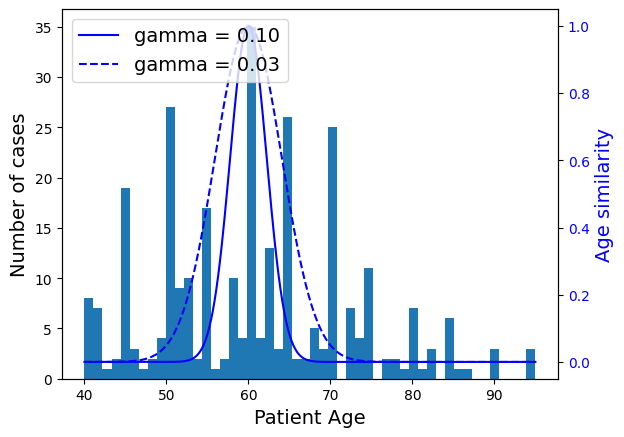

In [47]:
# Feature scaling and transformation
#min-max scaling and standarization
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
hf_num = hf.select_dtypes(include=[np.number])

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#min_max_scalar = MinMaxScaler(feature_range=(-1,1))
#hf_minmax_scaled = min_max_scalar.fit_transform(hf_num)

std_scalar = StandardScaler()
hf_std_scaled = std_scalar.fit_transform(hf_num)

#hf_tr_min_max = pd.DataFrame(hf_minmax_scaled, columns=hf_num.columns)
#hf_tr_std = pd.DataFrame(hf_std_scaled, columns=hf_num.columns)
#hf_tr_min_max.hist(bins=20, figsize=(15,10))
#hf_tr_std.hist(bins=20, figsize=(15,10))
#plt.show()

# Convert long tailed data to uniform distribution
#fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
#hf["creatinine_phosphokinase"].hist(ax=axs[0], bins=50)
#hf["creatinine_phosphokinase"].apply(np.log).hist(ax=axs[1], bins=50)
#axs[0].set_xlabel("creatinine_phosphokinase")
#axs[1].set_xlabel("creatinine_phosphokinase")
#axs[0].set_ylabel("number_cases")
#save_fig("long_tail_plot")
#fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
#hf['serum_creatinine'].hist(ax=axs[0], bins=50)
#hf['serum_creatinine'].apply(np.log).hist(ax=axs[1], bins=50)
#axs[0].set_xlabel("serum_creatinine")
#axs[1].set_xlabel("serum_creatinine")
#axs[0].set_ylabel("number_cases")

#plt.show()

from sklearn.metrics.pairwise import rbf_kernel
# new feature after rbf kernel transformation
age_simil_60 = rbf_kernel(hf[['age']], [[60]], gamma=0.1)

ages = np.linspace(hf["age"].min(),
                   hf["age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[60]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[60]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Patient Age")
ax1.set_ylabel("Number of cases")
ax1.hist(hf["age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
#save_fig("age_similarity_plot")
plt.show()


In [58]:
# clustering and measuring similarity
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))

from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=2, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(hf[["serum_creatinine"]], sample_weight=hf['DEATH_EVENT'])
similarities[:3].round(2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.49, 0.  , 0.  , 0.85, 0.37, 0.22, 0.99, 0.  , 0.78, 0.02],
       [1.  , 0.  , 0.  , 0.24, 0.04, 0.83, 0.59, 0.  , 0.91, 0.  ],
       [0.94, 0.  , 0.  , 0.37, 0.08, 0.68, 0.76, 0.  , 0.99, 0.  ]])

In [62]:
#Making pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))

num_pipeline = Pipeline([
   ("impute", SimpleImputer(strategy="median")),
   ("standardize", StandardScaler())
])

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("log", log_pipeline, ["creatinine_phosphokinase", "platelets", "serum_creatinine",
                               "serum_sodium"]),
        ("geo", cluster_simil, ["serum_creatinine"]),
    ],
    remainder=default_num_pipeline)

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
hf_prep = preprocessing.fit_transform(hf)
hf_prep.shape
print(preprocessing.get_feature_names_out())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['log__creatinine_phosphokinase' 'log__platelets' 'log__serum_creatinine'
 'log__serum_sodium' 'geo__Cluster 0 similarity'
 'geo__Cluster 1 similarity' 'geo__Cluster 2 similarity'
 'geo__Cluster 3 similarity' 'geo__Cluster 4 similarity'
 'geo__Cluster 5 similarity' 'geo__Cluster 6 similarity'
 'geo__Cluster 7 similarity' 'geo__Cluster 8 similarity'
 'geo__Cluster 9 similarity' 'remainder__age' 'remainder__anaemia'
 'remainder__diabetes' 'remainder__ejection_fraction'
 'remainder__high_blood_pressure' 'remainder__sex' 'remainder__smoking'
 'remainder__time' 'remainder__DEATH_EVENT']


Build and Train models

In [68]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
from pathlib import Path


hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))

num_pipeline = Pipeline([
   ("impute", SimpleImputer(strategy="median")),
   ("standardize", StandardScaler())
])

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("log", log_pipeline, ["creatinine_phosphokinase", "platelets", "serum_creatinine",
                               "serum_sodium"]),
        ("geo", cluster_simil, ["serum_creatinine"]),
    ],
    remainder=default_num_pipeline)

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
hf_train = hf.drop("DEATH_EVENT", axis=1)
hf_labels = hf["DEATH_EVENT"].copy()
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    hf, test_size=0.2, random_state=42)

hf_train = strat_train_set.drop("DEATH_EVENT", axis=1)
hf_train_labels = strat_train_set["DEATH_EVENT"].copy()

hf_test = strat_test_set.drop("DEATH_EVENT", axis=1)
hf_test_labels = strat_test_set["DEATH_EVENT"].copy()

from sklearn.linear_model import LogisticRegression

lin_reg = make_pipeline(preprocessing, LogisticRegression)
lin_reg.fit(hf_train, hf_train_labels,y= hf_train_labels["DEATH_EVENTS"])
print(lin_reg.score(hf_test, y=hf_test_labels))

KeyError: ignored